<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/pytorch_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

data = torch.randn(3,3)
data

tensor([[-0.2995,  0.1158,  0.9458],
        [ 0.4532,  0.0059, -0.1684],
        [ 0.6260,  0.9173,  0.6117]])

In [2]:
data.requires_grad

False

In [5]:
data.requires_grad_(True) #자동미분
data.requires_grad

True

In [6]:
data

tensor([[-0.2995,  0.1158,  0.9458],
        [ 0.4532,  0.0059, -0.1684],
        [ 0.6260,  0.9173,  0.6117]], requires_grad=True)

In [7]:
data_result = (data * data).mean()
data_result

tensor(0.3154, grad_fn=<MeanBackward0>)

In [8]:
data_result.grad_fn

In [9]:
data_result.backward()

In [10]:
data.grad

tensor([[-0.0665,  0.0257,  0.2102],
        [ 0.1007,  0.0013, -0.0374],
        [ 0.1391,  0.2038,  0.1359]])

In [12]:
data = torch.randn(3,3,requires_grad = True)
print((data+3).requires_grad)

True


In [14]:
with torch.no_grad(): #검증과정에서는 자동미분이 안되도록 해야함
    print((data+3).requires_grad)

False


In [15]:
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [16]:
data_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(0.5))
                                      ])

In [18]:
pwd #경로확인

'/content'

In [19]:
traindata = datasets.MNIST(root='/content',train=True,download=True,transform=data_transforms)
testdata = datasets.MNIST(root='/content',train=False,download=True,transform=data_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 88717183.73it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 73326691.18it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25216091.72it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4720150.83it/s]


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [20]:
train_loader = DataLoader(traindata,batch_size=4,shuffle=True)
test_loader = DataLoader(testdata,batch_size=4,shuffle=True)

In [21]:
print(len(train_loader))
print(len(test_loader))

15000
2500


In [22]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([4, 1, 28, 28])
torch.Size([4])


In [24]:
labels

tensor([9, 3, 9, 6])

In [27]:
images[0].shape

torch.Size([1, 28, 28])

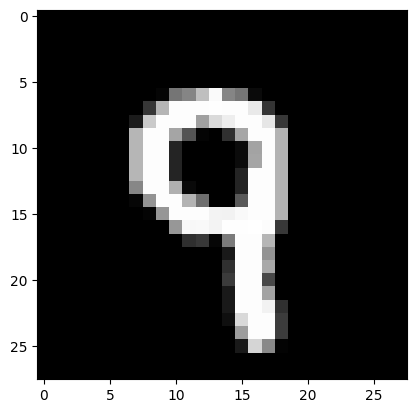

In [28]:
import matplotlib.pyplot as plt

plt.imshow(images[0].squeeze(), cmap='gray')
plt.show()